In [1]:
import glob
import json
import numpy as np

dir = "../experiments/batch_size_2"
json_files = sorted(glob.glob(f"{dir}/*/stat.json"), key=lambda x: int(x.split("/")[-2]))

In [2]:
def extract_psnr(file_name):
    with open(file_name, "r") as f:
        data = f.readlines()
    ret = []
    ret_step = []
    for line in data:
        if "psnr" in line:
            stat = json.loads(line)
            ret.append(stat["psnr"])
            ret_step.append(stat["step"])
    return np.array(ret), np.array(ret_step)

../experiments/batch_size_2/1/stat.json: 27.800294876098633 at step 18999
../experiments/batch_size_2/2/stat.json: 27.485498428344727 at step 10999
../experiments/batch_size_2/3/stat.json: 27.53167724609375 at step 25999
../experiments/batch_size_2/4/stat.json: 27.689977645874023 at step 28999
../experiments/batch_size_2/5/stat.json: 27.53327178955078 at step 29999
../experiments/batch_size_2/6/stat.json: 27.891315460205078 at step 23999
../experiments/batch_size_2/7/stat.json: 27.717531204223633 at step 17999
../experiments/batch_size_2/8/stat.json: 27.877988815307617 at step 27999
../experiments/batch_size_2/9/stat.json: 27.777143478393555 at step 17999
../experiments/batch_size_2/10/stat.json: 27.737592697143555 at step 20999
../experiments/batch_size_2/11/stat.json: 27.98339080810547 at step 29999
../experiments/batch_size_2/12/stat.json: 27.591833114624023 at step 27999
../experiments/batch_size_2/13/stat.json: 28.216798782348633 at step 15999
../experiments/batch_size_2/14/stat.j

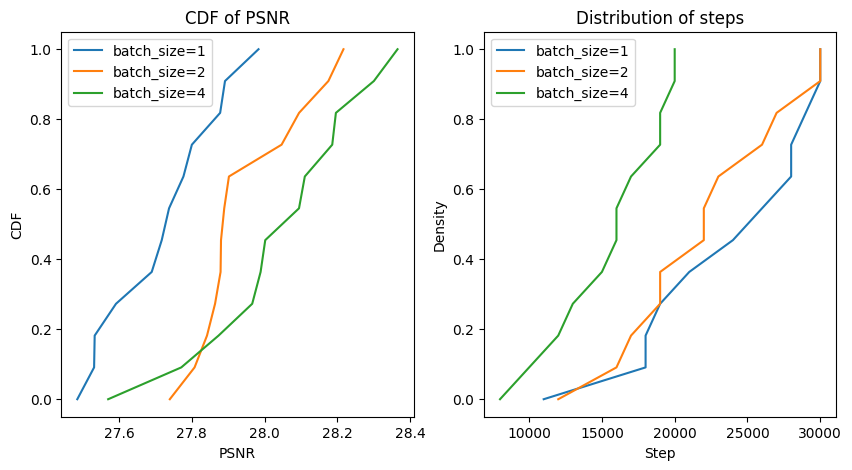

batch_size=1
mean: 27.71812629699707, var: 0.15174601781763905
batch_size=2
mean: 27.944823265075684, var: 0.1447460740080428
batch_size=4
mean: 28.035425345102947, var: 0.2154466824342961


In [3]:
all_psnr = []
all_maxstep = []
for f in json_files:
    psnr, step = extract_psnr(f)
    all_psnr.append(psnr.max())
    all_maxstep.append(step[psnr.argmax()])
    print(f"{f}: {psnr.max()} at step {step[psnr.argmax()]}")

import matplotlib.pyplot as plt
all_psnr = np.array(all_psnr)
all_maxstep = np.array(all_maxstep)
# two figures: left psnr's CDF, right steps' distribution
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(3):
    # ax[0].hist(all_psnr[i*12:i*12+12], bins=100, density=True, cumulative=True, histtype='step', label=f"batch_size={2**i}")
    ax[0].plot(np.sort(all_psnr[i*12:i*12+12]), np.linspace(0, 1, 12), label=f"batch_size={2**i}")
    # ax[1].hist(all_maxstep[i*12:i*12+12], bins=100, density=True, histtype='step', label=f"batch_size={2**i}")
    ax[1].plot(np.sort(all_maxstep[i*12:i*12+12]), np.linspace(0, 1, 12), label=f"batch_size={2**i}")
ax[0].set_title("CDF of PSNR")
ax[0].set_xlabel("PSNR")
ax[0].set_ylabel("CDF")
ax[0].legend()
ax[1].set_title("Distribution of steps")
ax[1].set_xlabel("Step")
ax[1].set_ylabel("Density")
ax[1].legend()
plt.show()


for i in range(3):
    print(f"batch_size={2**i}")
    print(f"mean: {all_psnr[i*12:i*12+12].mean()}, var: {all_psnr[i*12:i*12+12].std()}")




In [4]:
"""
../res/251.json: 27.3546142578125 at step 27999
../res/67.json: 27.583616256713867 at step 17999
../res/263.json: 27.40787696838379 at step 25999
../res/83.json: 27.80030059814453 at step 23999
../res/173.json: 27.490116119384766 at step 25999
../res/229.json: 27.796295166015625 at step 27999
../res/163.json: 27.854475021362305 at step 29999
../res/109.json: 27.738529205322266 at step 27999
../res/5.json: 28.249082565307617 at step 27999
../res/269.json: 28.15526580810547 at step 19999
../res/137.json: 27.952707290649414 at step 21999
../res/233.json: 27.790903091430664 at step 25999
../res/13.json: 27.76120376586914 at step 21999
../res/19.json: 27.74229621887207 at step 29999
../res/197.json: 27.7427921295166 at step 25999
../res/227.json: 27.941335678100586 at step 19999
../res/241.json: 28.097248077392578 at step 29999
../res/79.json: 27.342845916748047 at step 29999
../res/103.json: 28.57079315185547 at step 25999
../res/211.json: 27.492900848388672 at step 27999
../res/107.json: 27.57066535949707 at step 29999
../res/29.json: 28.09755516052246 at step 23999
../res/2.json: 27.259201049804688 at step 25999
../res/191.json: 27.68897247314453 at step 25999
../res/43.json: 28.013830184936523 at step 21999
../res/7.json: 28.295026779174805 at step 27999
../res/31.json: 27.694931030273438 at step 29999
../res/17.json: 27.868289947509766 at step 21999
../res/167.json: 27.503849029541016 at step 29999
../res/181.json: 27.917421340942383 at step 25999
../res/53.json: 27.788124084472656 at step 19999
../res/157.json: 27.637496948242188 at step 25999
../res/179.json: 27.54955291748047 at step 23999
../res/42.json: 27.82692527770996 at step 27999
../res/193.json: 27.436742782592773 at step 25999
../res/59.json: 26.98398208618164 at step 29999
../res/3.json: 27.6968936920166 at step 25999
../res/139.json: 28.065380096435547 at step 29999
../res/101.json: 27.937381744384766 at step 23999
../res/23.json: 27.761730194091797 at step 23999
../res/11.json: 27.70309829711914 at step 27999
../res/47.json: 27.811992645263672 at step 29999
../res/97.json: 27.691795349121094 at step 29999
../res/131.json: 27.45431137084961 at step 27999
../res/239.json: 27.965177536010742 at step 29999
../res/127.json: 27.496578216552734 at step 23999
../res/151.json: 27.857820510864258 at step 21999
../res/71.json: 27.576749801635742 at step 27999
../res/113.json: 27.499107360839844 at step 21999
../res/223.json: 28.01483726501465 at step 27999
../res/199.json: 28.2296142578125 at step 29999
../res/61.json: 27.865028381347656 at step 23999
../res/37.json: 28.03579330444336 at step 29999
../res/89.json: 27.709230422973633 at step 29999
../res/41.json: 27.646156311035156 at step 29999
../res/257.json: 27.351411819458008 at step 29999
../res/149.json: 27.742671966552734 at step 19999
../res/73.json: 27.64904022216797 at step 27999

"""

'\n../res/251.json: 27.3546142578125 at step 27999\n../res/67.json: 27.583616256713867 at step 17999\n../res/263.json: 27.40787696838379 at step 25999\n../res/83.json: 27.80030059814453 at step 23999\n../res/173.json: 27.490116119384766 at step 25999\n../res/229.json: 27.796295166015625 at step 27999\n../res/163.json: 27.854475021362305 at step 29999\n../res/109.json: 27.738529205322266 at step 27999\n../res/5.json: 28.249082565307617 at step 27999\n../res/269.json: 28.15526580810547 at step 19999\n../res/137.json: 27.952707290649414 at step 21999\n../res/233.json: 27.790903091430664 at step 25999\n../res/13.json: 27.76120376586914 at step 21999\n../res/19.json: 27.74229621887207 at step 29999\n../res/197.json: 27.7427921295166 at step 25999\n../res/227.json: 27.941335678100586 at step 19999\n../res/241.json: 28.097248077392578 at step 29999\n../res/79.json: 27.342845916748047 at step 29999\n../res/103.json: 28.57079315185547 at step 25999\n../res/211.json: 27.492900848388672 at step 2